In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [22]:
- 1 - (4 * 0.38 -3)

0.48


 ################################
 30 terminals 
####################################



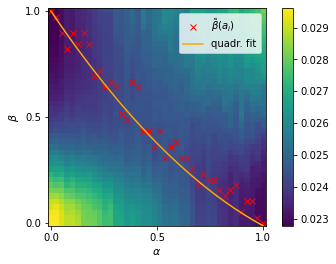


 ################################
 50 terminals 
####################################



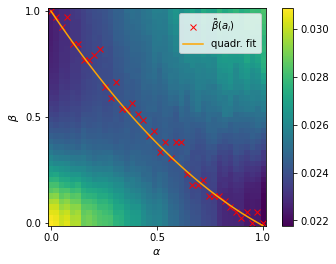


 ################################
 100 terminals 
####################################



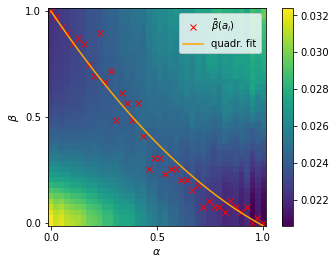

In [20]:
# load score matrices from server experiment:
num_terminals_arr = np.array([30,50,100])

num_al = 40
num_beta = 40
x_ticks_str = np.round(np.linspace(0,1,num_al),2)
summed_score_stress_mat = np.zeros((40,40))

#fit parabola
d = 0.38 * num_al
b = 4* d/num_al - 3 
c = num_al
a = (-1 - b)/num_al

for num_terminals in num_terminals_arr:
    print(f"\n ################################\n {num_terminals} terminals \n####################################\n")
    
    #load data:
    pkl_file_path = f"results/{num_al}x{num_beta}_a2probs_size{num_terminals}.pkl"
    pkl_file = open(pkl_file_path, 'rb')
    data_dict = pickle.load(pkl_file)
    pkl_file.close()
    
    score_mat = data_dict["score_mat"]
    score_stress_mat = data_dict["score_stress_mat"]
    
    #normalise and plot them:
    #plot score matrix:
    #score_mat = score_mat / np.sum(score_mat, axis=1)[:,None]
    #plt.figure()
    #plt.imshow(score_mat.T, origin='lower')
    #plt.colorbar()
    #plt.plot(np.arange(num_al), np.argmin(score_mat, axis=1), marker="o", color="red", linestyle="")
    #plt.xlabel("$\\alpha$")
    #plt.ylabel("$\\beta$")
    ##plt.axis("equal")
    #plt.xticks(np.linspace(0,num_al-1,3), np.linspace(0,1,3))
    #plt.yticks(np.linspace(0,num_al-1,3), np.linspace(0,1,3))
    #plt.show()

    #plot score stress matrix:
    score_stress_mat = score_stress_mat / np.sum(score_stress_mat, axis=1)[:,None]
    summed_score_stress_mat += score_stress_mat
    plt.figure()
    plt.imshow(score_stress_mat.T, origin='lower')
    plt.colorbar()
    plt.plot(np.arange(num_al), np.argmin(score_stress_mat, axis=1), marker="x", color="red", linestyle="", label="$\\tilde \\beta(a_i)$")
    
    plt.plot(np.arange(num_al), a*np.arange(num_al)**2 + b*np.arange(num_al) + c - 1, color="orange", label="quadr. fit")
    #plt.plot(np.arange(num_al), num_al - np.arange(num_al)- 1)

    
    plt.xlabel("$\\alpha$", fontsize=11)
    plt.ylabel("$\\beta$", fontsize=11)
    #plt.axis("equal")
    plt.xticks(np.linspace(0,num_al-1,3), np.linspace(0,1,3))
    plt.yticks(np.linspace(0,num_al-1,3), np.linspace(0,1,3))
    plt.legend()
    plt.savefig(f"heatmap_{num_terminals}.pdf", bbox_inches="tight")
    plt.show()

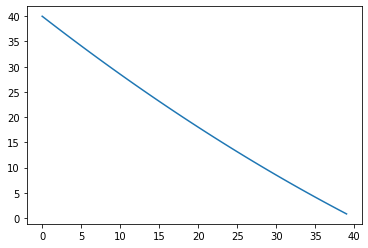

In [4]:
d = 0.45 * num_al
b = 4* d/num_al - 3 
c = num_al
a = (-1 - b)/num_al

plt.plot(np.arange(num_al), a*np.arange(num_al)**2 + b*np.arange(num_al) + c)
plt.show()

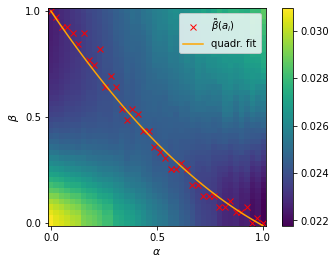

In [18]:
plt.figure()
plt.imshow(summed_score_stress_mat.T / 3, origin='lower')
plt.colorbar()
plt.plot(np.arange(num_al), np.argmin(summed_score_stress_mat, axis=1), marker="x", color="red", linestyle="", label="$\\tilde \\beta(a_i)$")

plt.plot(np.arange(num_al), a*np.arange(num_al)**2 + b*np.arange(num_al) + c - 1, color="orange", label="quadr. fit")
#plt.plot(np.arange(num_al), num_al - np.arange(num_al)- 1)


plt.xlabel("$\\alpha$", fontsize=11)
plt.ylabel("$\\beta$", fontsize=11)
#plt.axis("equal")
plt.xticks(np.linspace(0,num_al-1,3), np.linspace(0,1,3))
plt.yticks(np.linspace(0,num_al-1,3), np.linspace(0,1,3))
plt.legend()
plt.savefig(f"heatmap_average.pdf")
plt.show()

In [ ]:
# parabola through 3 points:
points = np.array([
    [0,1],
    [1,0],
    
])

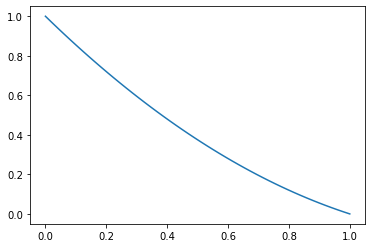

In [23]:
b = -1.5
c = 1
a = 0.5

x = np.linspace(0,1)

plt.plot(x, a*x**2 + b*x + c)
plt.show()